In [114]:
# https://github.com/joelgrus/data-science-from-scratch/blob/master/scratch/working_with_data.py

from typing import List, Dict
from collections import Counter
import math
import statistics
import matplotlib.pyplot as plt
import numpy as np

In [16]:
def bucketize(point, bucket_size):
    return bucket_size * math.floor(point / bucket_size)

In [17]:
def make_histogram(points, bucket_size):
    return Counter(bucketize(point, bucket_size) for point in points)

In [18]:
def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

In [35]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x-mu)/math.sqrt(2)/ sigma)) /2

In [39]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """
    Find the approximate inverse using binary search
    """
    if mu != 0 or sigma != 1:
        return mu + sigma * inversenormal_cdf(p, tolerance=tolerance)
    low_z = -10.0
    hi_z = 10.0
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z
    return mid_z

In [40]:
import random
random.seed(0)

In [41]:
uniform = [200 * random.random() - 100 for _ in range(10000)]
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

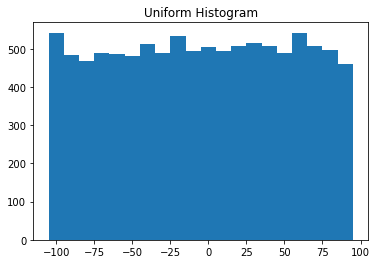

In [42]:
# one dimensional data
#points = np.random.randint(0, 10, size=10)
bucket_size = 10
title = "Uniform Histogram"
plot_histogram(points=uniform, bucket_size=bucket_size, title=title)

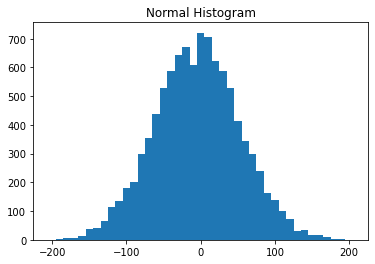

In [43]:
# one dimensional data
#points = np.random.randint(0, 10, size=10)
bucket_size = 10
title = "Normal Histogram"
plot_histogram(points=normal, bucket_size=bucket_size, title=title)

In [44]:
# two dimensional data
def random_normal():
    """
    Returns a random draw from a standard normal distribution
    """
    return inverse_normal_cdf(random.random())

In [45]:
# These look similar in one dimensional data, but in 2 dimensions....
# they have the same mean, and std, range, etc. but on the second axis they look very different.
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

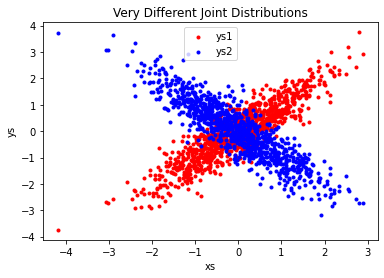

In [48]:
# they look very different 
plt.scatter(xs, ys1, marker=".", color='red', label='ys1')
plt.scatter(xs, ys2, marker='.', color='blue', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [62]:
def dot(v, w):
    return sum(v_i* w_i for v_i, w_i in zip(v, w))
assert dot([1,2,3], [4,5,6]) == 32  # or 1*4 + 2*5 + 3*6

In [63]:
def sum_of_squares(v):
    """returns the sum of the squares of each element in a vector"""
    return dot(v,v)
assert sum_of_squares([1,2,3]) == 14 # or 1*1 + 2*2 + 3*3

In [64]:
def variance(xs):
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

In [65]:
def std_dev(xs):
    return math.sqrt(variance(xs))

In [66]:
def de_mean(xs):
    x_bar = statistics.mean(xs)
    return [x - x_bar for x in xs]

In [67]:
def covariance(xs, ys):
    return dot(de_mean(xs), de_mean(ys)) / (len(xs ) - 1)

In [68]:
def correlation(xs, ys):
    stdev_x = std_dev(xs)
    stdev_y = std_dev(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0

In [69]:
print(correlation(xs, ys1))
print(correlation(xs, ys2))
# as xs goes up ys1 goes up
# as xs goes up ys2 goes down

0.9010493686379609
-0.8920981526880033


In [70]:
# many dimensions

Vector = List[float]
Matrix = List[List[float]]

def make_matrix(num_rows, num_columns, entry):
    """Creates a matrix of entered number of rows * number of columns with the inputted sequence you specify"""
    return [[entry(i,j)
            for j in range(num_columns)]
           for i in range(num_rows)]

In [71]:
def correlation_matrix(data):
    """
    Returns the len(data) * len(data) matrix whose (i, j)-th entry 
    is the correlation between data[i] and data[j]
    This can more simply be done with .corr() in pandas
    """
    def correlation_ij(i, j):
        return correlation(data[i], data[j])
    return make_matrix(len(data), len(data), correlation_ij)

In [75]:
data = (xs, ys1)
datas = (xs, ys2)
datas

([-0.5221271514892578,
  -0.27518272399902344,
  0.5436038970947266,
  -0.03283500671386719,
  2.1323299407958984,
  -0.7730770111083984,
  0.5921840667724609,
  -0.6050968170166016,
  -1.1173343658447266,
  -1.761789321899414,
  -0.2959728240966797,
  -1.101388931274414,
  1.3263416290283203,
  1.5264415740966797,
  0.2241802215576172,
  -0.19942283630371094,
  0.05705833435058594,
  -0.3956317901611328,
  0.0031757354736328125,
  0.18227577209472656,
  0.9667873382568359,
  -0.9165668487548828,
  1.1913776397705078,
  -0.22850990295410156,
  1.2807178497314453,
  -0.6016254425048828,
  0.48310279846191406,
  -0.9629344940185547,
  0.7273578643798828,
  -1.1349010467529297,
  -0.2194690704345703,
  -0.8298778533935547,
  1.988210678100586,
  0.09402275085449219,
  -0.9430408477783203,
  -0.2164173126220703,
  -1.3148021697998047,
  -0.6201839447021484,
  -1.1651325225830078,
  1.1763858795166016,
  1.0527515411376953,
  0.010061264038085938,
  0.5023288726806641,
  -0.8736705780029297

In [77]:
print(correlation_matrix(data))
print(correlation_matrix(datas))

[[1.0, 0.9010493686379609], [0.9010493686379609, 1.0]]
[[1.0, -0.8920981526880033], [-0.8920981526880033, 1.0]]


In [79]:
# multiple charts with subplots
#corr_data = np.random.randint(0, 100, size = (4, 100))
#corr_data

array([[ 9, 22, 39, 47, 18, 76, 27,  6, 89, 75, 77, 66,  7, 79, 65, 86,
        67, 72, 48, 39, 42, 89,  8, 14, 77, 54, 70, 31, 15, 13, 68, 93,
        49, 44, 37, 47, 89, 73, 94, 70, 72, 11, 41, 95, 80, 78, 21, 95,
        26, 80, 58, 20, 76,  1, 92, 33, 62, 84,  8, 33, 29, 97, 32, 15,
        19, 76, 52, 85, 17, 40, 42, 50, 56, 31, 52, 58, 59, 21, 27, 35,
         1, 22,  4, 52, 49, 30, 81,  5, 55, 90, 92, 48, 64, 79, 79,  1,
        26, 84, 62, 50],
       [ 6, 86, 80, 37,  1,  1, 67, 96, 64, 72, 96, 17, 33,  2, 74, 91,
        90, 79, 57, 63, 21, 11, 69,  6, 83, 63, 48, 78, 89,  4, 84, 54,
        94, 73,  8, 90, 45, 33, 34, 61, 67, 84, 48,  9, 95, 76,  0, 42,
        33, 70, 28, 29, 22, 51, 81,  0, 19, 69,  2, 92, 53, 71, 42, 63,
        60, 51, 19, 80, 87, 85, 56, 28, 16, 85, 39, 96, 75, 10, 89, 89,
        66, 23, 56, 18, 11, 38, 25,  0, 93,  0, 59, 39, 55, 34,  4, 32,
        79, 78, 89, 32],
       [88,  0, 42, 89, 80, 85, 29, 24,  0, 50, 29, 95, 48,  5, 91, 34,
        93, 41

In [89]:
num_points = 100

def random_row() -> List[float]:
   row = [0.0, 0, 0, 0]
   row[0] = random_normal()
   row[1] = -5 * row[0] + random_normal()
   row[2] = row[0] + row[1] + 5 * random_normal()
   row[3] = 6 if row[2] > -2 else 0
   return row

random.seed(0)
# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]

corr_data = [list(col) for col in zip(*corr_rows)]

# corr_data is a list of four 100-d vectors
num_vectors = len(corr_data)

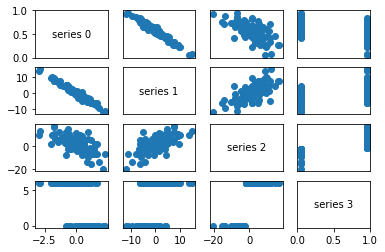

In [90]:
fig, ax = plt.subplots(num_vectors, num_vectors)
for i in range(num_vectors):
    for j in range(num_vectors):
        
        # Scatter column_j on the x-axis vs. column_i on the y-axis
        if i != j:
            ax[i][j].scatter(corr_data[j], corr_data[i])
        
        # unless i==j, in which case show the series name
        else:
            ax[i][j].annotate("series " + str(i), (0.5, 0.5), xycoords='axes fraction', ha='center', va='center')
        
        # then hide axis labels except left and bottom charts
        if i < num_vectors-1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0:
            ax[i][j].yaxis.set_visible(False)

In [91]:
import datetime

In [94]:
stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'
              }
stock_price

{'closing_price': 102.06, 'date': datetime.date(2014, 8, 29), 'symbol': 'AAPL'}

In [95]:
from collections import namedtuple

In [97]:
StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)
assert price.symbol == 'MSFT'
assert price.closing_price == 106.03

In [98]:
from typing import NamedTuple
class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float
    
    def is_high_tech(self):
        """
        It's a class,so we can add methods too
        """
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

In [101]:
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)
assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [102]:
from dataclasses import dataclass

In [103]:
@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float
    
    def is_high_tech(self):
        """
        It's a class,so we can add methods too
        """
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

In [112]:
price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)
assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()
price2

StockPrice2(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [113]:
price2.closing_price /= 2
price2
assert price2.closing_price == 53.015, "That wasn't true"

StockPrice2(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=53.015)

In [116]:
# Cleaning data
from dateutil.parser import parse

In [117]:
def parse_row(row):
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol, date=parse(date).date(), closing_price=float(closing_price))

In [120]:
stock = parse_row(['MSFT', '2018-12-14', '106.03'])
assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

In [121]:
stock

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [138]:
from typing import Optional
import re
def try_parse_row(row):
    symbol, date_, closing_price_ = row
    if not re.match(r"^[A-Z]+$", symbol):
                    return None
    try:
                   date = parse(date_).date()
    except ValueError:
                   return None
    try:
                   closing_price = float(closing_price_)
    except ValueError:
                   return None
    return StockPrice(symbol, date, closing_price)

In [142]:
assert try_parse_row(['MSFT0', '2018-12-14', '106.03']) is None
assert try_parse_row(['MSFT', '2018-12--14', 106.03]) is None
assert try_parse_row(['MSFT', '2018-12-14', 'x']) is None
assert try_parse_row(['MSFT', '2018-12-14', '106.03']) == stock

In [144]:
import csv
data: List[StockPrice] = []

In [158]:
with open("comma_delimited_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f"skipping invalid row: {row}")
        else:
            data.append(maybe_stock)
            #print(maybe_stock)

skipping invalid row: ['MSFT', '6/19/2014', 'n/a']


In [159]:
# manipulating data
from collections import defaultdict

In [160]:
max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))
    
for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price

In [161]:
max_prices

defaultdict(<function __main__.<lambda>()>,
            {'AAPL': 91.86, 'MSFT': 41.68, 'FB': 64.5})

In [162]:
from typing import List
from collections import defaultdict

In [163]:
prices: Dict[str, List[StockPrice]] = defaultdict(list)
for sp in data: prices[sp.symbol].append(sp)

In [170]:
prices = {symbol: sorted(symbol_prices)
         for symbol, symbol_prices in prices.items()}
prices

{'AAPL': [StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 19), closing_price=91.86),
  StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 19), closing_price=91.86),
  StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 19), closing_price=91.86),
  StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 20), closing_price=90.91),
  StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 20), closing_price=90.91),
  StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 20), closing_price=90.91)],
 'MSFT': [StockPrice(symbol='MSFT', date=datetime.date(2014, 6, 20), closing_price=41.68),
  StockPrice(symbol='MSFT', date=datetime.date(2014, 6, 20), closing_price=41.68),
  StockPrice(symbol='MSFT', date=datetime.date(2014, 6, 20), closing_price=41.68)],
 'FB': [StockPrice(symbol='FB', date=datetime.date(2014, 6, 19), closing_price=64.34),
  StockPrice(symbol='FB', date=datetime.date(2014, 6, 19), closing_price=64.34),
  StockPrice(symbol='FB', date=datetime.date(2014, 6, 19), closing_

In [182]:
def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

In [183]:
class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float
        
def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """
    Assumes prices are for one stock and are in order
    """
    return [DailyChange(symbol=today.symbol, date=today.date, pct_change=pct_change(yesterday, today)) for yesterday, today in zip(prices, prices[1:])]
        
all_changes = [change for symbol_prices in prices.values() for change in day_over_day_changes(symbol_prices)]
all_changes

[DailyChange(symbol='AAPL', date=datetime.date(2014, 6, 19), pct_change=0.0),
 DailyChange(symbol='AAPL', date=datetime.date(2014, 6, 19), pct_change=0.0),
 DailyChange(symbol='AAPL', date=datetime.date(2014, 6, 20), pct_change=-0.0103418245155672),
 DailyChange(symbol='AAPL', date=datetime.date(2014, 6, 20), pct_change=0.0),
 DailyChange(symbol='AAPL', date=datetime.date(2014, 6, 20), pct_change=0.0),
 DailyChange(symbol='MSFT', date=datetime.date(2014, 6, 20), pct_change=0.0),
 DailyChange(symbol='MSFT', date=datetime.date(2014, 6, 20), pct_change=0.0),
 DailyChange(symbol='FB', date=datetime.date(2014, 6, 19), pct_change=0.0),
 DailyChange(symbol='FB', date=datetime.date(2014, 6, 19), pct_change=0.0),
 DailyChange(symbol='FB', date=datetime.date(3014, 6, 20), pct_change=0.0024867889337891746),
 DailyChange(symbol='FB', date=datetime.date(3014, 6, 20), pct_change=0.0),
 DailyChange(symbol='FB', date=datetime.date(3014, 6, 20), pct_change=0.0)]

In [184]:
max_change = max(all_changes, key=lambda change: change.pct_change)
assert max_change.symbol == 'AAPL'
assert max_change.date == datetime.date(1997,8,6)
assert 0.33 < min_change.pct_change < 0.34

AssertionError: 

In [185]:
min_change = min(all_changes, key=lambda change: change.pct_change)
assert min_change.symbol == 'AAPL'
assert min_change.date == datetime.date(2000, 9, 29)
assert -0.52 < min_change.pct_change < -0.51
min_change

AssertionError: 

In [186]:
changes_by_month: List[DailyChange] = {month: [] for month in range(1,13)}
changes_by_month

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: []}

In [188]:
for change in all_changes:
    changes_by_month[change.date.month].append(change)
changes_by_month

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [DailyChange(symbol='AAPL', date=datetime.date(2014, 6, 19), pct_change=0.0),
  DailyChange(symbol='AAPL', date=datetime.date(2014, 6, 19), pct_change=0.0),
  DailyChange(symbol='AAPL', date=datetime.date(2014, 6, 20), pct_change=-0.0103418245155672),
  DailyChange(symbol='AAPL', date=datetime.date(2014, 6, 20), pct_change=0.0),
  DailyChange(symbol='AAPL', date=datetime.date(2014, 6, 20), pct_change=0.0),
  DailyChange(symbol='MSFT', date=datetime.date(2014, 6, 20), pct_change=0.0),
  DailyChange(symbol='MSFT', date=datetime.date(2014, 6, 20), pct_change=0.0),
  DailyChange(symbol='FB', date=datetime.date(2014, 6, 19), pct_change=0.0),
  DailyChange(symbol='FB', date=datetime.date(2014, 6, 19), pct_change=0.0),
  DailyChange(symbol='FB', date=datetime.date(3014, 6, 20), pct_change=0.0024867889337891746),
  DailyChange(symbol='FB', date=datetime.date(3014, 6, 20), pct_change=0.0),
  DailyChange(symbol='FB', date=datetime.date(3014, 6, 20), pc

In [189]:
avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes) for month, changes in changes_by_month.items()
}

ZeroDivisionError: division by zero

In [190]:
# rescaling

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), 'Vectors must be of same length'
    return[v_i - w_i for v_i, w_i in zip(v, w)]

def dot(v: Vector, w: Vector) -> Vector:
    return sum(v_i* w_i for v_i, w_i in zip(v, w))
assert dot([1,2,3], [4,5,6]) == 32  # or 1*4 + 2*5 + 3*6

def sum_of_squares(v: Vector) -> float:
    """returns the sum of the squares of each element in a vector"""
    return dot(v,v)
assert sum_of_squares([1,2,3]) == 14 # or 1*1 + 2*2 + 3*3

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + (v_2 - w_2) ** 2 + etc"""
    return sum_of_squares(subtract(v, w))
assert squared_distance([3,4,5], [2,3,4]) == 3

In [195]:
Vector = List[float]

def vector_multiply(c: float, v:Vector) -> Vector:
    """Multiplies every element in a vector by c i.e user input"""
    return [c * v_i for v_i in v]

def vector_mean(*vectors: List[Vector]) -> Vector:
    """ Computes the element-wise average"""
    
    # number of vectors to average by
    n = len(*vectors)
    return vector_multiply(1/n, vector_sum(*vectors))

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    #Check that vectors is not empty
    assert vectors, "No vectors provided!"
    
    #Check that the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "Different Sizes"
    
    #The i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]
assert vector_sum([[1,2],[3,4],[5,6], [7,8]]) == [16,20]

In [196]:
def variance(xs):
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

def std_dev(xs):
    return math.sqrt(variance(xs))

In [200]:
def scale(data):
    """
    Returns the mean and standard deviation for each position
    """
    dim = len(data[0])
    means = vector_mean(data)
    stdevs = [std_dev([vector[i] for vector in data]) for i in range(dim)]
    return means, stdevs

In [202]:
vectors = [[-3, -1, 1], [-1, 0, 1], [1,1,1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2,1,0]

In [207]:
def rescale(data):
    """
    Rescales the input data so that each position has mean 0 and 
    standard deviation 1. (Leaves a position as is if its standard deviation is 0)
    """
    dim = len(data[0])
    means, stdevs = scale(data)
    rescaled = [v[:] for v in data]
    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]
    return rescaled

In [208]:
means, stdevs = scale(rescale(vectors))
assert means == [0,0,1]
assert stdevs == [1,1,0]

In [221]:
import math

def magnitude(v: Vector) -> float:
    return math.sqrt(sum_of_squares(v))
assert magnitude([3,4]) == 5
assert magnitude([4,4,4,4]) == 8

In [211]:
# tqdm
import tqdm

In [214]:
for i in tqdm.tqdm(range(100)):
    _ = [random.random() for _ in range(100000)]

100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


In [216]:
from typing import List
def primes_up_to(n):
    primes = [2]
    with tqdm.trange(3, n) as t:
        for i in t:
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)
            t.set_description(f"{len(primes)} primes")

In [218]:
primes_up_to(1000)

168 primes: 100%|██████████| 997/997 [00:07<00:00, 126.95it/s]


In [220]:
# dimensionality reduction
# PRINCIPAL COMPONENT ANALYSIS
# extract one or more dimensions that capture as much of the variation in the dataset as possible
# what variable explains the variation the most? What explains the spread in the data the most?

def de_mean(data):
    """
    Recenters the data to have a mean of 0 in every dimension
    """
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

In [222]:
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [225]:
def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

In [226]:
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

In [229]:
def vector_multiply(c: float, v:Vector) -> Vector:
    """Multiplies every element in a vector by c i.e user input"""
    return [c * v_i for v_i in v]

In [234]:
def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), 'Vectors must be of same length'
    return [v_i + w_i for v_i, w_i in zip(v, w)]

In [235]:
def gradient_step(v, gradient, step_size):
    """
    Moves 'step_size' in the 'gradient' direction from 'v'
    """
    assert len(v) == len(gradient)
    step = vector_multiply(step_size, gradient)
    return add(v, step)

In [236]:
def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")

    return direction(guess)

In [237]:
pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

In [238]:
first_principal_component(pca_data)

dv: 66177.324: 100%|██████████| 100/100 [00:00<00:00, 113.04it/s]


[0.8496912068397404, -0.5272806207506829]

In [250]:
def project(v, w):
    """
    Returns the projection of v onto the direction w
    """
    projection_length = dot(v, w)
    return vector_multiply(projection_length, w)

In [251]:
def remove_projection_from_vector(v, w):
    """
    Projects v onto w and subtracts the result from v
    """
    return subtract(v, project(v, w))

In [252]:
def remove_projection(data, w):
    return [remove_projection_from_vector(v, w) for v in data]

In [260]:
def pca(data, num_components):
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)
    return components

In [261]:
def transform_vector(v, components):
    return [dot(v, w) for w in components]

In [262]:
def transform(data, components):
    return [transform_vector(v, components) for v in data]

In [271]:
pca(pca_data, 2)

dv: 7408.149: 100%|██████████| 100/100 [00:01<00:00, 99.74it/s]


[[0.8496912068397404, -0.5272806207506829],
 [0.52728247019284, 0.8496900591552998]]